In [5]:
##### ===== System Setup ==== ##### 

%load_ext dotenv
%dotenv

import os, sys
sys.path.append(os.getenv('SRC_DIR'))


The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [6]:
##### >>> 1: Testing with INTC (Intel)
## >> 1.1 Load Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [7]:
## >> 1.2 Load the price data, INTC = Intel
Tick = 'INTC'
RAW_FILE = os.path.join(os.getenv('SRC_DIR'), "prices-split-adjusted.csv")
df = pd.read_csv(RAW_FILE, parse_dates=["date"])
df['symbol'].unique()

print(f"Ticker: {Tick}")
print(f"Data Exist: {Tick in df['symbol'].unique() }")

df = df[df["symbol"] == Tick].sort_values("date")  # Example: AAPL
df = df[["date", "close"]].set_index("date")
df.tail()

Ticker: INTC
Data Exist: True


,close
date,
2016-12-23,36.970001
2016-12-27,37.070000
2016-12-28,36.630001
2016-12-29,36.660000
2016-12-30,36.270000


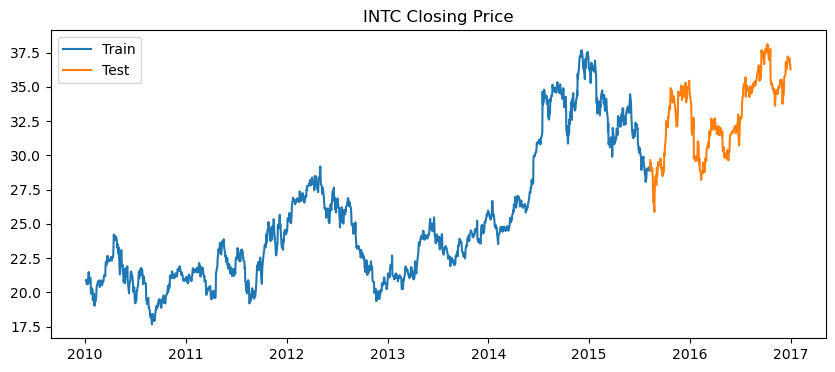

/home/yikai/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/yikai/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/yikai/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/yikai/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is availab

ARIMA MSE: 23.7401
ARIMA MAE: 4.1538


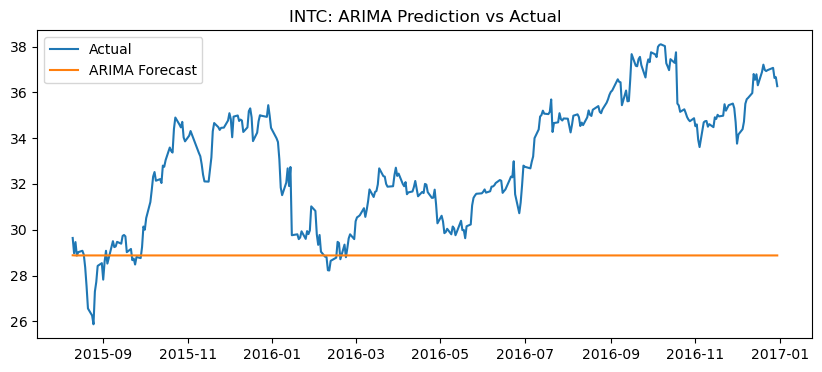

In [8]:
## >> 2. 80/20 train-test split + ARIMA 
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

plt.figure(figsize=(10,4))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.legend()
plt.title(f"{Tick} Closing Price")
plt.show()

## >> 3. ARIMA Model (baseline)
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(train, order=(5,1,0))
fit_arima = model_arima.fit()

pred_arima = fit_arima.forecast(steps=len(test))
mse_arima = mean_squared_error(test, pred_arima)
mae_arima = mean_absolute_error(test, pred_arima)

print(f"ARIMA MSE: {mse_arima:.4f}")
print(f"ARIMA MAE: {mae_arima:.4f}")

plt.figure(figsize=(10,4))
plt.plot(test.index, test["close"], label="Actual")
plt.plot(test.index, pred_arima, label="ARIMA Forecast")
plt.legend()
plt.title(f"{Tick}: ARIMA Prediction vs Actual")
plt.show()


2025-11-06 19:47:45.501772: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-06 19:47:45.519643: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-06 19:47:45.525244: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-06 19:47:45.537871: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-06 19:47:46.134334: W tensorflow/compiler/tf2

Epoch 1/20


/home/yikai/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0397
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0013
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.7646e-04
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.7589e-04
Epoch 9/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010
Epoch 10/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.8932e-04
Epoch 11/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 12/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9278e-04
Epoch 13/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.7596e-04
Epoch 14/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9303e-04
Epoch 15/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.8247e-04
Ep

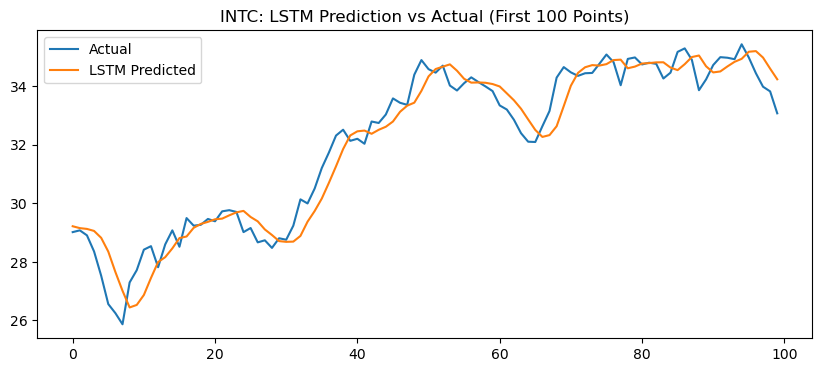

In [9]:
## >> 3. LSTM Model (Deep Learning) + 100 data point

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Scale data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

# Create supervised data (look_back = 20)
def create_dataset(series, look_back=20):
    X, y = [], []
    for i in range(len(series) - look_back):
        X.append(series[i:i+look_back])
        y.append(series[i+look_back])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled, look_back=20)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define model
model_lstm = Sequential([
    LSTM(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')

# Train
history = model_lstm.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

# Predict
y_pred = model_lstm.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

mse_lstm = mean_squared_error(y_test_inv, y_pred_inv)
mae_lstm = mean_absolute_error(y_test_inv, y_pred_inv)

print(f"LSTM MSE: {mse_lstm:.4f}")
print(f"LSTM MAE: {mae_lstm:.4f}")

plt.figure(figsize=(10,4))
plt.plot(y_test_inv[:100], label="Actual")
plt.plot(y_pred_inv[:100], label="LSTM Predicted")
plt.legend()
plt.title(f"{Tick}: LSTM Prediction vs Actual (First 100 Points)")
plt.show()
